In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [4]:
#there are no missing values in this dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA

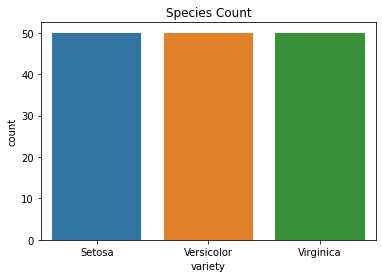

In [7]:
plt.title('Species Count')
sns.countplot(df['variety']);

In [8]:
#From the plots, we can infer that it is balanced dataset(all classes have equal number of datapoints)

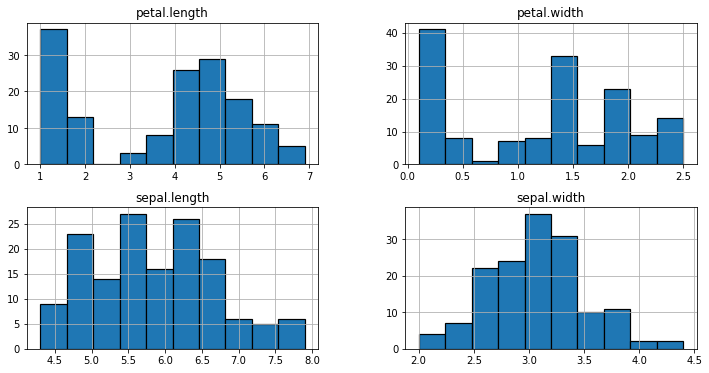

In [9]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Classification model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

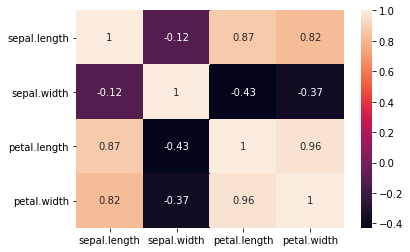

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### We can infer that petal length and width are higgly correalted(in the range of 0.8). ALso,we can infer that the speal length and width are not relatted (negatively correlated)

In [23]:
#splitting the dataset into training and testing dataset
train, test = train_test_split(df, test_size=0.4,random_state=2) #train dataset=70% and testing dataset=30%
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [24]:
train_x = train[['sepal.length','sepal.width','petal.length','petal.width']] 
train_y = train.variety #target var
test_x= test[['sepal.length','sepal.width','petal.length','petal.width']] 
test_y = test.variety 

## Basic logistic regression

In [25]:
model=LogisticRegression()
model.fit(train_x,train_y)
predicted=model.predict(test_x)
print("the accuraxy is ",metrics.accuracy_score(predicted,test_y))

the accuraxy is  0.95


## Decision Tree classifier

In [26]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
predicted=model.predict(test_x)
print("the accuracy is ",metrics.accuracy_score(predicted,test_y))

the accuracy is  0.95


## KNN

In [27]:
scores={}
scores_list=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    predicted=knn.predict(test_x)
    scores[i]=metrics.accuracy_score(test_y,predicted)
    scores_list.append(metrics.accuracy_score(test_y,predicted))
scores

{1: 0.9666666666666667,
 2: 0.95,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.95,
 9: 0.9666666666666667,
 10: 0.95,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667}

Text(0, 0.5, 'Accuracy')

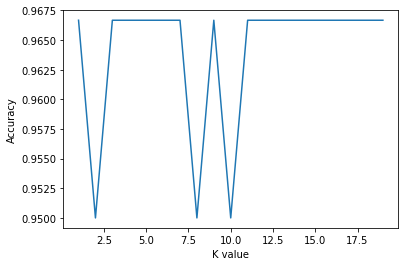

In [28]:
#plotting the graph for the 'K' value w its accuracy score
range_k=range(1,20)
plt.plot(range_k,scores_list)
plt.xlabel('K value')
plt.ylabel('Accuracy')

#### From the above graph,we can take the values of k as 5 (accuracy of 96%)

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x,train_y)
predicted=knn.predict(test_x)
score=metrics.accuracy_score(test_y,predicted)
print(score*100,"%")

96.66666666666667 %
